### This jupyter notebook is to unit-test CFE model run

## Preparation

In [11]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [12]:
input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/forcing_daily_2014_2018_PT.csv",
    "catchment_area_km2": 0.1210,
    "soil_params": {
        "bb": 3.09959,
        "satdk": 0.0006337005372924745,
        "satpsi": 0.141,
        "slop": 0.0780138971050,
        "smcmax": 0.53145771238,
        "wltsmc": 0.08104691732,
        "D": 2
    },
    "max_gw_storage": 0.25,
    "Cgw": 0.0022459,
    "expon": 2.3143687226,
    "K_nash": 0.06869085622075158,
    "refkdt": 3.3019654214710785,
    "trigger_z_fact":0.3360649479525811,
    "alpha_fc": 0.331,
    "K_lf": 1.0,
    "num_nash_storage":2,
    "giuh_ordinates": [
        0.5,
        0.5
    ],
    "alpha_fc": 0.33,
    "stand_alone": 1,
    "unit_test": 1,
    "time_step_size": 86400,
    "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/test_daily_2014_2018_sm_basinavg.csv"
}
# params = {
#     "forcing_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/forcing_daily_2014_2018.csv",
#     "catchment_area_km2": 0.1210,
#     "soil_params": {
#         "bb": 3.2079604777790642,
#         "satdk": 0.001937923227788561,
#         "satpsi": 0.141,
#         "slop": 0.008716394514218791,
#         "smcmax": 1.0,
#         "wltsmc": 0.000142,
#         "satpsi": 0.141,
#         "D": 0.6
#     },
#     "max_gw_storage": 0.19,
#     "Cgw": 0.001,
#     "expon": 3.0,
#     "K_nash": 0.00001,
#     "refkdt": 1.1560090173921909,
#     "trigger_z_fact": 0.570054772877,
#     "alpha_fc": 0.33,
#     "K_lf": 0.9784460486586726,
#     "num_nash_storage":2,
#     "giuh_ordinates": [
#         0.5,
#         0.5
#     ],
#     "alpha_fc": 0.33,
#     "stand_alone": 1,
#     "unit_test": 1,
#     "time_step_size": 86400,
#     "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/test_daily_2014_2018_sm_basinavg.csv"
# }
# params = {
#     "forcing_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/forcing_daily_2014_2018.csv",
#     "catchment_area_km2": 0.1210,
#     "soil_params": {
#         "bb": 4.644110006820757,
#         "satdk": 6.4e-06,
#         "satpsi": 0.141,
#         "slop": 0.03259498499163006,
#         "smcmax": 0.5362769263074253,
#         "wltsmc": 0.000142,
#         "D": 0.6
#     },
#     "max_gw_storage": 0.07131124353538958,
#     "Cgw": 2.583430901047755e-05,
#     "expon": 2.262536693375373,
#     "K_nash": 0.9663068364166432,
#     "refkdt": 0.3172842866917587,
#     "trigger_z_fact": 0.75,
#     "alpha_fc": 0.33,
#     "K_lf": 0.000424,
#     "num_nash_storage":2,
#     "giuh_ordinates": [
#         0.5,
#         0.5
#     ],
#     "stand_alone": 1,
#     "unit_test": 1,
#     "time_step_size": 86400,
#     "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/test_daily_2014_2018_sm_basinavg.csv"
# }
with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

GW & SM converged <1% after warm-up iteration 2; diff_gw: 0.0000495; diff_sm: 0.0000000


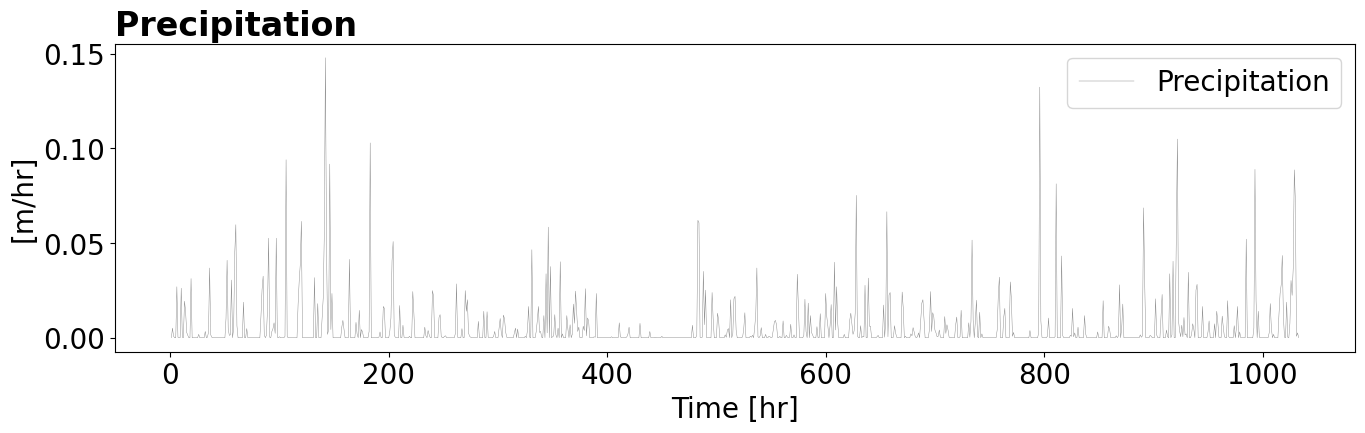

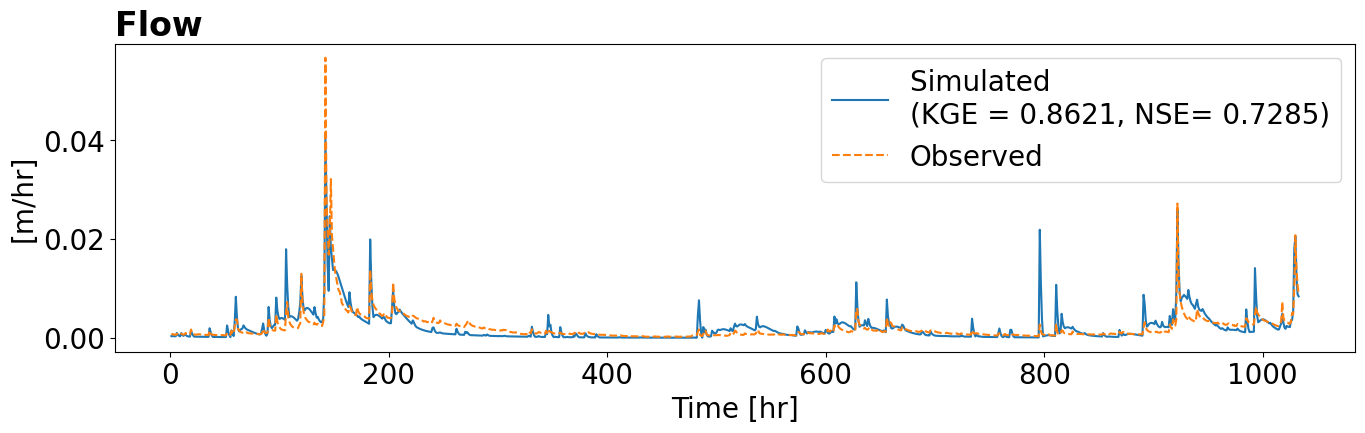

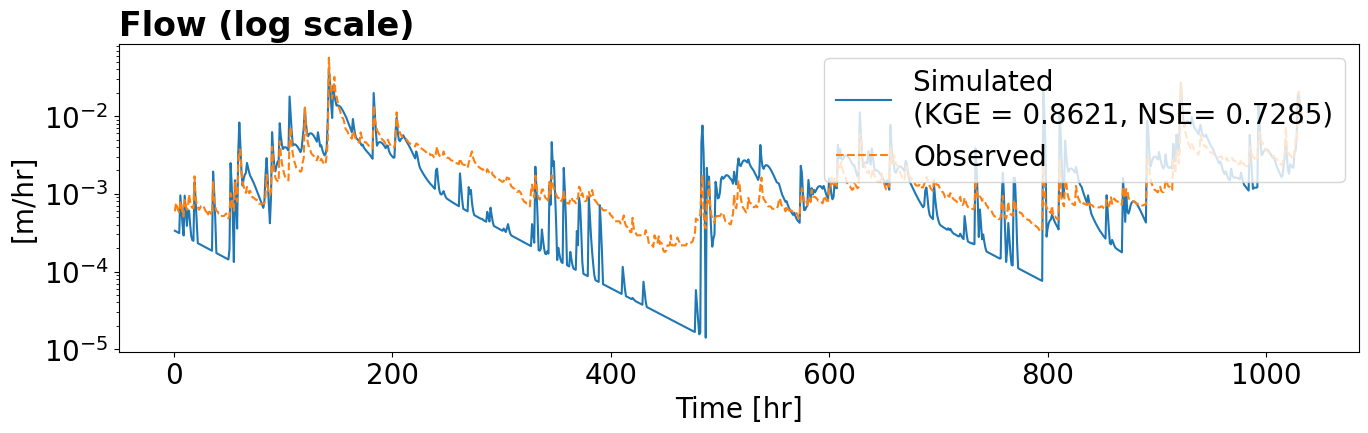

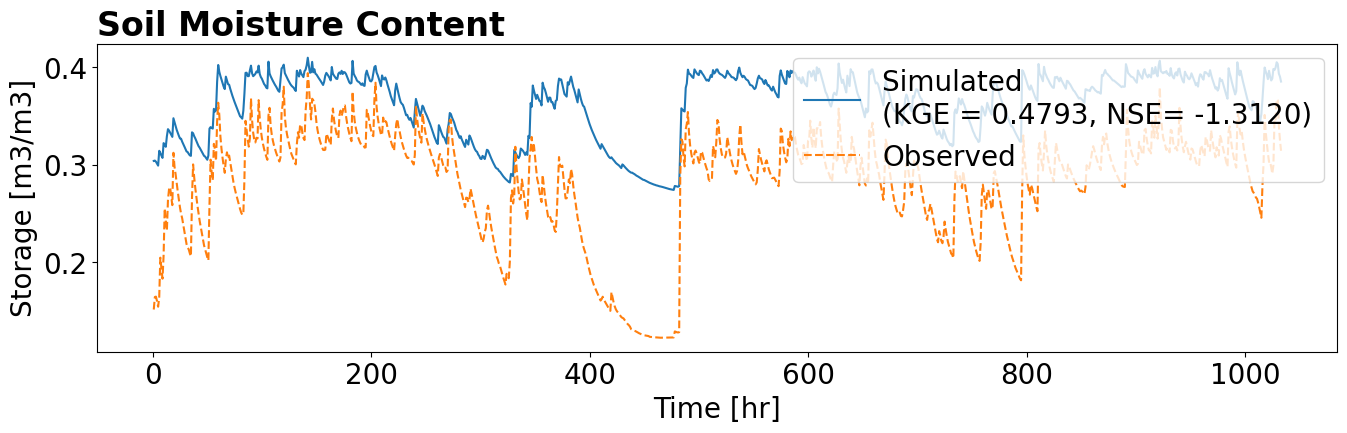

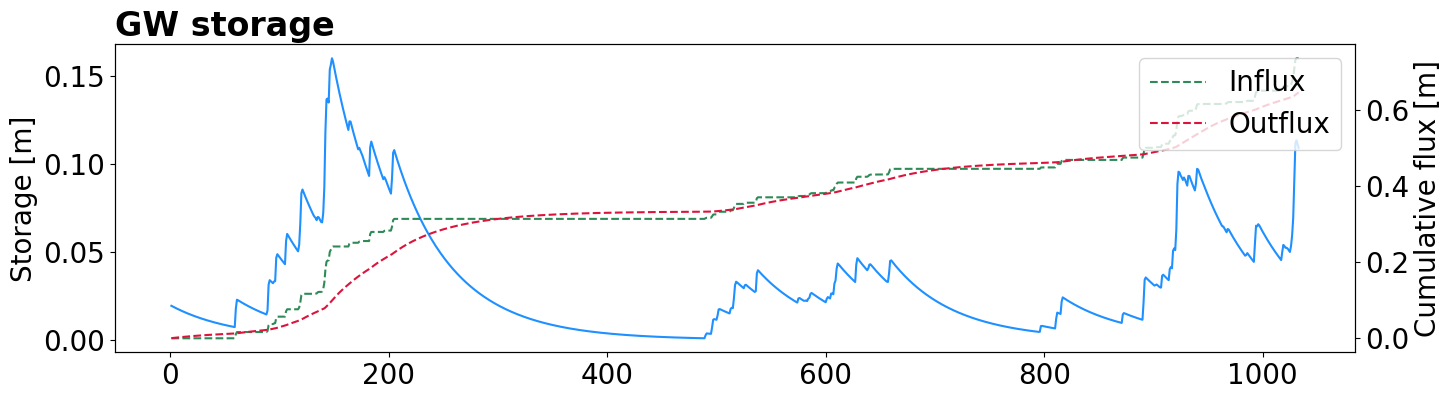

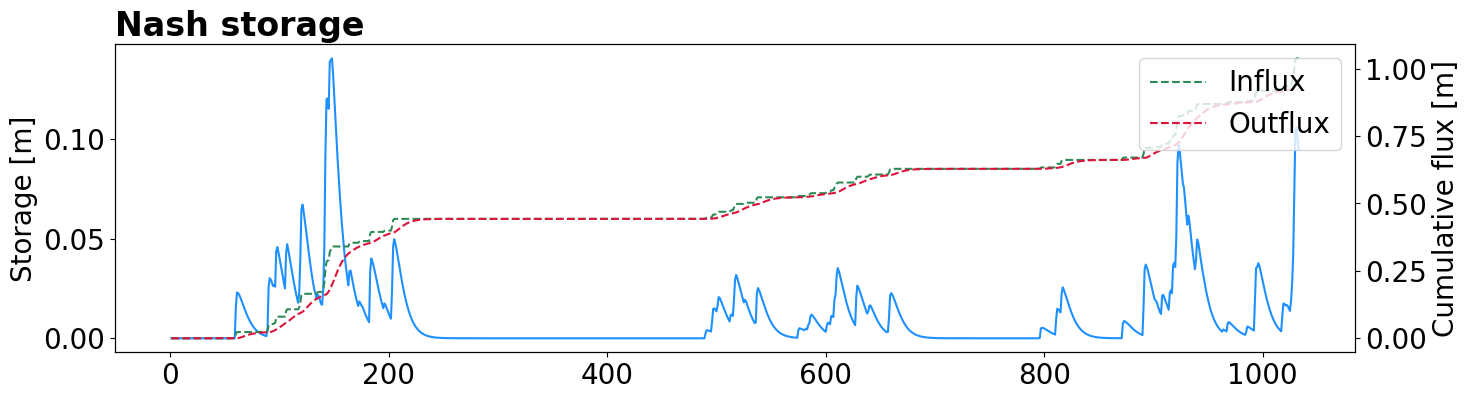

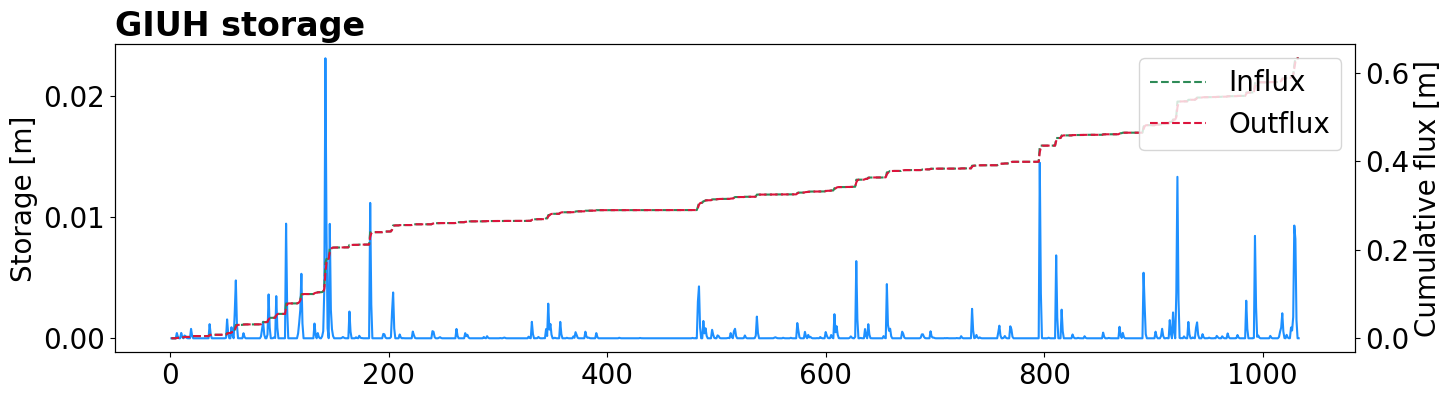


GLOBAL MASS BALANCE
      initial volume:   0.4205
        volume input:   5.7958
       volume output:   5.6149
        final volume:   0.6014
            residual: -1.2212e-15

 Discharge details
Cumulative discharge: 2.23
        Runoff ratio: 0.38
      Surface runoff: 0.28
  Deep GW to channel: 0.29
        Lateral flow: 0.43

 AET & PET
      volume PET:   4.3239
      volume AET:   3.2967
ET from rainfall:   0.9638
    ET from soil:   2.3328

SCHAAKE MASS BALANCE
    volume input:   5.7958
ET from rainfall:   0.9638
  surface runoff:   0.6321
             IOF:   0.6321
             SOF:   0.0000
    infiltration:   4.1998
schaake residual: -7.1054e-15

GIUH MASS BALANCE
  vol. into giuh:   0.6321
   vol. out giuh:   0.6321
 vol. end giuh q:   0.0000
   giuh residual: 7.7716e-16

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.4005
  vol. into soil:   4.1998
vol.soil2latflow:   1.0384
 vol. soil to gw:   0.7348
 vol. soil to ET:   2.3328
 final vol. soil:   0.

In [13]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(
    plot=True,
    print_fluxes=True,
    plot_lims=list(range(1, 1034)),
    warm_up=True,
    warmup_offset=300,
    warmup_iteration=10
)
cfe_instance.finalize(print_mass_balance=True)